#### OFM3 — OFM3 TASK 2: DIMENSIONALITY REDUCTION METHODS

<ul>
<li>Ryan L. Buchanan</li>
<li>Student ID:  001826691</li>
<li>Masters Data Analytics (12/01/2020)</li>
<li>Program Mentor:  Dan Estes</li>
<li>385-432-9281 (MST)</li>
<li>rbuch49@wgu.edu</li>
</ul>

#### Scenario 1
One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term.

You are an analyst for a telecommunications company that wants to better understand the characteristics of its customers. You have been asked to perform a market basket analysis to analyze customer data to identify key associations of your customer purchases, ultimately allowing better business and strategic decision-making.

#### Part I: Research Question

#### <span style="color:green"><b>A1. Proposal of Question</b>:</span>
Which principal variables of our customers demonstrate that they are at high risk of churn?  And, therefore, which customers' features indicate relationship that might help identify customers that may potentially churn?  This question will be answered using principal component analysis (PCA).
<br>In other words, though we are not using a supervised learning model, such as linear regression, trying to make prediction, we are trying to better understand the relationships between customer features in order to inform stakeholder decisions.


#### <span style="color:green"><b>A2. Defined Goal</b>:</span>
Stakeholders in the company will benefit by knowing, with some measure of confidence, which customers are at highest risk of churn because this will provide weight for decisions in marketing improved services to customers with these characteristics and past user experiences.
The goal of this data analysis is to present numerical values to company stakeholders to help them better understand their customers and the principal components that cause customer churn.

#### Part II: Technique Justification
B.  Explain the reasons for using PCA by doing the following:

#### <span style="color:green"><b>B1. Explanation of of PCA</b>:</span>
<span style="color:red">Explain how PCA analyzes the selected data set. Include expected outcomes.</span>

<span style="color:orange">(SuperDataScience)</span>

#### <span style="color:green"><b>B2. PCA Assumption</b>:</span>
<span style="color:red">Summarize one assumption of PCA.</span>

<span style="color:orange">(Grant, p. 1)</span>.

#### Part III: Data Preparation
C.  Perform data preparation for the chosen dataset by doing the following:

#### <span style="color:green"><b>C1. Continuous Dataset Variables</b>:</span>
In cleaning the data, we may discover relevance of the continuous predictor variables:
* Children
* Age
* Income
* Outage_sec_perweek
* Email
* Contacts    
* Yearly_equip_failure
* Tenure (the number of months the customer has stayed with the provider)
* MonthlyCharge
* Bandwidth_GB_Year    

Our target variable for all of these analyses is Churn. Churn is a binary (yes/no) variable.  So will accordingly encode it with dummy variables (1/0). 

In [28]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Import Scikit Learn PCA application
from sklearn.decomposition import PCA

In [2]:
# Change color of Matplotlib font
import matplotlib as mpl

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [3]:
# Increase Jupyter display cell-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [4]:
# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load data set into Pandas dataframe
churn_df = pd.read_csv('data/churn_clean.csv', index_col=0)

In [6]:
# Examine the features of the dataset
churn_df.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [7]:
# Get an idea of dataset size
churn_df.shape

(10000, 49)

In [8]:
# Examine first few records of dataset
churn_df.head()

Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                        UID         City State  \
CaseOrder                                                        
1          e885b299883d4f9fb18e39c75155d990  Point Baker    AK   
2          f2de8bef964785f41a2959829830fb8a  West Branch    MI   
3          f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR   
4          dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA   
5          aabb64a116e83fdc4befc1fbab1663f9    Needville    TX   

                          County    Zip       Lat        Lng  Population  ...  \
CaseOrder                                                                 ...   
1          Prince of Wales-Hyder  99927  56.25100 -133.37571          38  ...   
2                         Ogemaw  48661  44.32893  -84.24080       10446  ...   
3                        Yamhill  97148  45.35589 -123.24657        3735  ...   
4                      San Diego  92014  32.96687 -117.24798       13863  ...   
5                      Fort Bend  77461  29.38012  -95.80673       11352  ...   

          MonthlyCharge Bandwidth_GB_Year Item1  Item2  Item3  Item4 Item5  \
CaseOrder                                                                    
1            172.455519        904.536110     5      5      5      3     4   
2            242.632554        800.982766     3      4      3      3     4   
3            159.947583       2054.706961     4      4      2      4     4   
4            119.956840       2164.579412     4      4      4      2     5   
5            149.948316        271.493436     4      4      4      3     4   

          Item6 Item7  Item8  
CaseOrder                     
1             4     3      4  
2             3     4      4  
3             3     3      3  
4             4     3      3  
5             4     4      5  

[5 rows x 49 columns]

In [9]:
# View DataFrame info
churn_df.info

<bound method DataFrame.info of           Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...               ...                                   ...   
9996          M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9997          D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9998          I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9999          I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
10000          T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                        UID          City State  \
CaseOrder                                                         
1          e88

In [10]:
# Provide an initial look at extant dataset
churn_df.head()

Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                        UID         City State  \
CaseOrder                                                        
1          e885b299883d4f9fb18e39c75155d990  Point Baker    AK   
2          f2de8bef964785f41a2959829830fb8a  West Branch    MI   
3          f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR   
4          dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA   
5          aabb64a116e83fdc4befc1fbab1663f9    Needville    TX   

                          County    Zip       Lat        Lng  Population  ...  \
CaseOrder                                                                 ...   
1          Prince of Wales-Hyder  99927  56.25100 -133.37571          38  ...   
2                         Ogemaw  48661  44.32893  -84.24080       10446  ...   
3                        Yamhill  97148  45.35589 -123.24657        3735  ...   
4                      San Diego  92014  32.96687 -117.24798       13863  ...   
5                      Fort Bend  77461  29.38012  -95.80673       11352  ...   

          MonthlyCharge Bandwidth_GB_Year Item1  Item2  Item3  Item4 Item5  \
CaseOrder                                                                    
1            172.455519        904.536110     5      5      5      3     4   
2            242.632554        800.982766     3      4      3      3     4   
3            159.947583       2054.706961     4      4      2      4     4   
4            119.956840       2164.579412     4      4      4      2     5   
5            149.948316        271.493436     4      4      4      3     4   

          Item6 Item7  Item8  
CaseOrder                     
1             4     3      4  
2             3     4      4  
3             3     3      3  
4             4     3      3  
5             4     4      5  

[5 rows x 49 columns]

In [11]:
# Get an overview of descriptive statistics
churn_df.describe()

Zip           Lat           Lng     Population    Children  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.0000   
mean   49153.319600     38.757567    -90.782536    9756.562400      2.0877   
std    27532.196108      5.437389     15.156142   14432.698671      2.1472   
min      601.000000     17.966120   -171.688150       0.000000      0.0000   
25%    26292.500000     35.341828    -97.082813     738.000000      0.0000   
50%    48869.500000     39.395800    -87.918800    2910.500000      1.0000   
75%    71866.500000     42.106908    -80.088745   13168.000000      3.0000   
max    99929.000000     70.640660    -65.667850  111850.000000     10.0000   

                Age         Income  Outage_sec_perweek         Email  \
count  10000.000000   10000.000000        10000.000000  10000.000000   
mean      53.078400   39806.926771           10.001848     12.016000   
std       20.698882   28199.916702            2.976019      3.025898   
min       18.000000     348.670000            0.099747      1.000000   
25%       35.000000   19224.717500            8.018214     10.000000   
50%       53.000000   33170.605000           10.018560     12.000000   
75%       71.000000   53246.170000           11.969485     14.000000   
max       89.000000  258900.700000           21.207230     23.000000   

           Contacts  ...  MonthlyCharge  Bandwidth_GB_Year         Item1  \
count  10000.000000  ...   10000.000000       10000.000000  10000.000000   
mean       0.994200  ...     172.624816        3392.341550      3.490800   
std        0.988466  ...      42.943094        2185.294852      1.037797   
min        0.000000  ...      79.978860         155.506715      1.000000   
25%        0.000000  ...     139.979239        1236.470827      3.000000   
50%        1.000000  ...     167.484700        3279.536903      3.000000   
75%        2.000000  ...     200.734725        5586.141369      4.000000   
max        7.000000  ...     290.160419        7158.981530      7.000000   

              Item2         Item3         Item4         Item5         Item6  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.505100      3.487000      3.497500      3.492900      3.497300   
std        1.034641      1.027977      1.025816      1.024819      1.033586   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        4.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        7.000000      8.000000      7.000000      7.000000      8.000000   

              Item7         Item8  
count  10000.000000  10000.000000  
mean       3.509500      3.495600  
std        1.028502      1.028633  
min        1.000000      1.000000  
25%        3.000000      3.000000  
50%        4.000000      3.000000  
75%        4.000000      4.000000  
max        7.000000      8.000000  

[8 rows x 22 columns]

In [12]:
# Get data types of features
churn_df.dtypes

Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBa

In [13]:
# Encode binary categorical variable with dummies
churn_df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in churn_df['Churn']] ### If the customer left (churned) they get a '1'

In [14]:
# Drop original binary categorical feature from dataframe
churn_df = churn_df.drop(columns=['Churn'])

In [15]:
# Remove less meaningful non-numerical categorical variables from dataset to provide fully numerical dataframe
churn_df = churn_df.drop(columns=['Customer_id', 'Interaction', 'UID', 'City', 'State', 
                                  'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 
                                  'Job', 'Marital', 'PaymentMethod', 'Gender', 'Techie', 
                                  'Contract', 'Port_modem', 'Tablet', 
                                  'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 
                                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                                  'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 
                                  'Item8'])

In [16]:
# Move DummyChurn to end of dataset to set as target
churn_df = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'DummyChurn']]

In [19]:
churn_df.head()

Children  Age    Income  Outage_sec_perweek  Email  Contacts  \
CaseOrder                                                                 
1                 0   68  28561.99            7.978323     10         0   
2                 1   27  21704.77           11.699080     12         0   
3                 4   50   9609.57           10.752800      9         0   
4                 1   48  18925.23           14.913540     15         2   
5                 0   83  40074.19            8.147417     16         2   

           Yearly_equip_failure     Tenure  MonthlyCharge  Bandwidth_GB_Year  \
CaseOrder                                                                      
1                             1   6.795513     172.455519         904.536110   
2                             1   1.156681     242.632554         800.982766   
3                             1  15.754144     159.947583        2054.706961   
4                             0  17.087227     119.956840        2164.579412   
5                             1   1.670972     149.948316         271.493436   

           DummyChurn  
CaseOrder              
1                   0  
2                   1  
3                   0  
4                   0  
5                   1

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


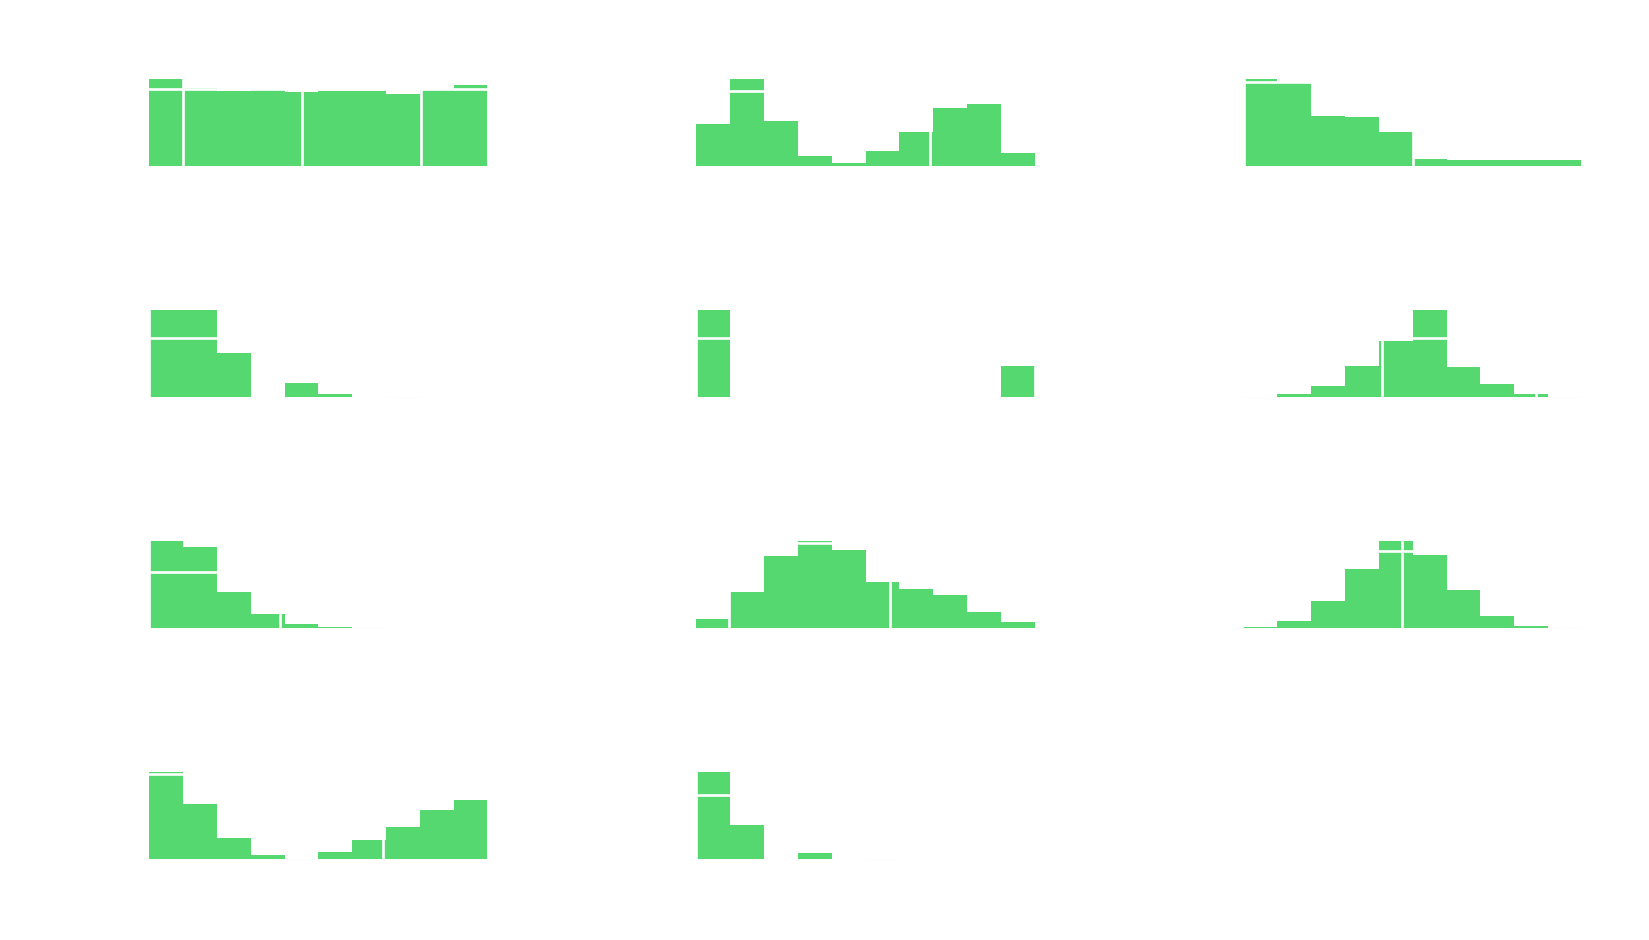

In [20]:
# Create histograms of contiuous variables & categorical variables
churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 
          'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 
          'Bandwidth_GB_Year', 'DummyChurn']].hist()
plt.tight_layout()

In [21]:
# Set plot style to ggplot for aesthetics & R style
plt.style.use('ggplot')

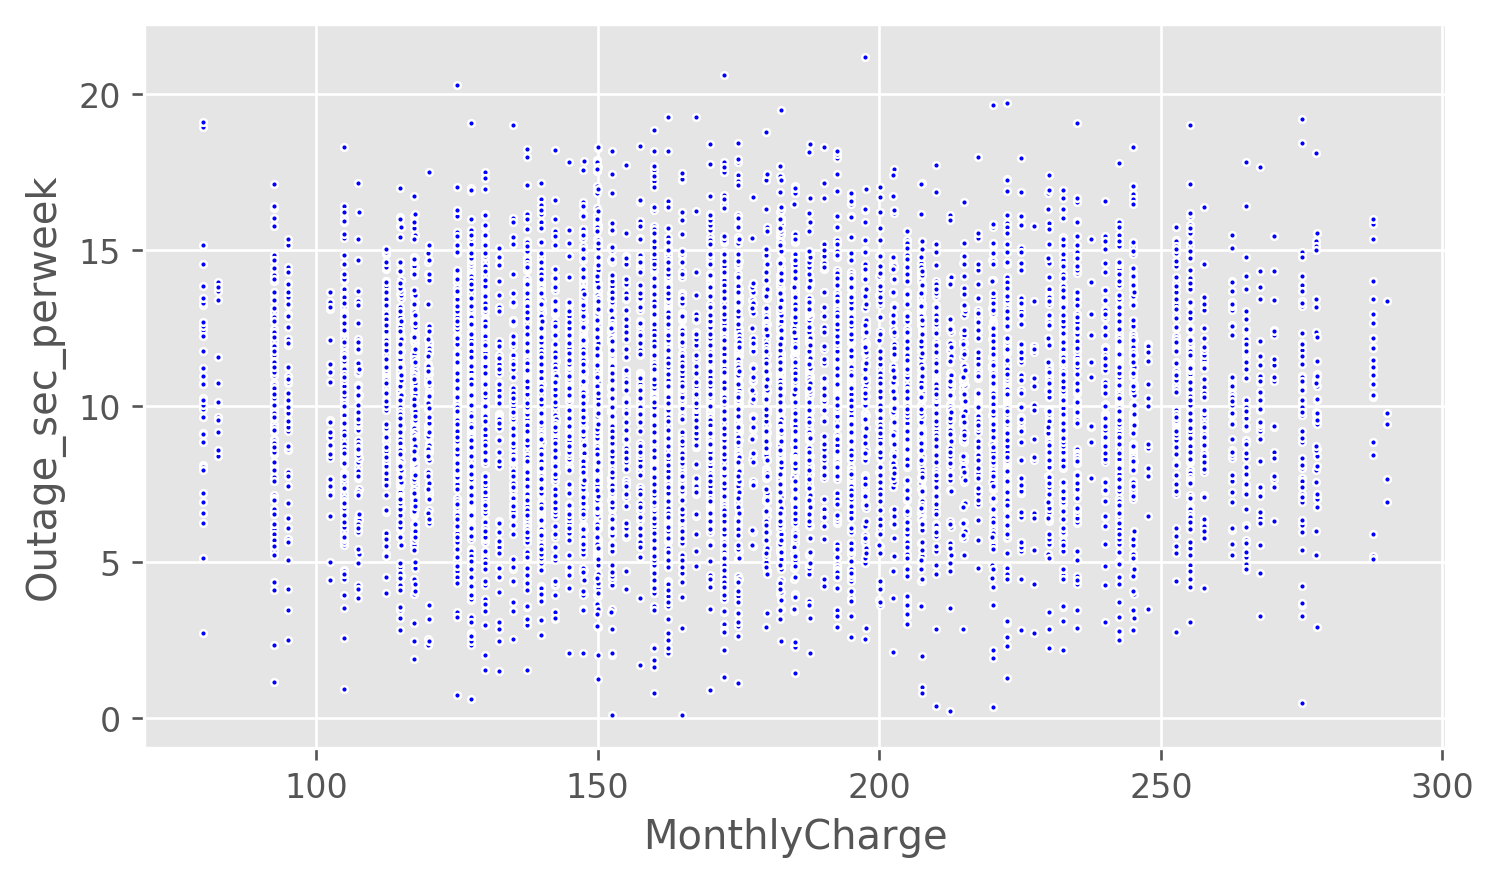

In [22]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=churn_df['MonthlyCharge'], y=churn_df['Outage_sec_perweek'], color='blue')
plt.show();

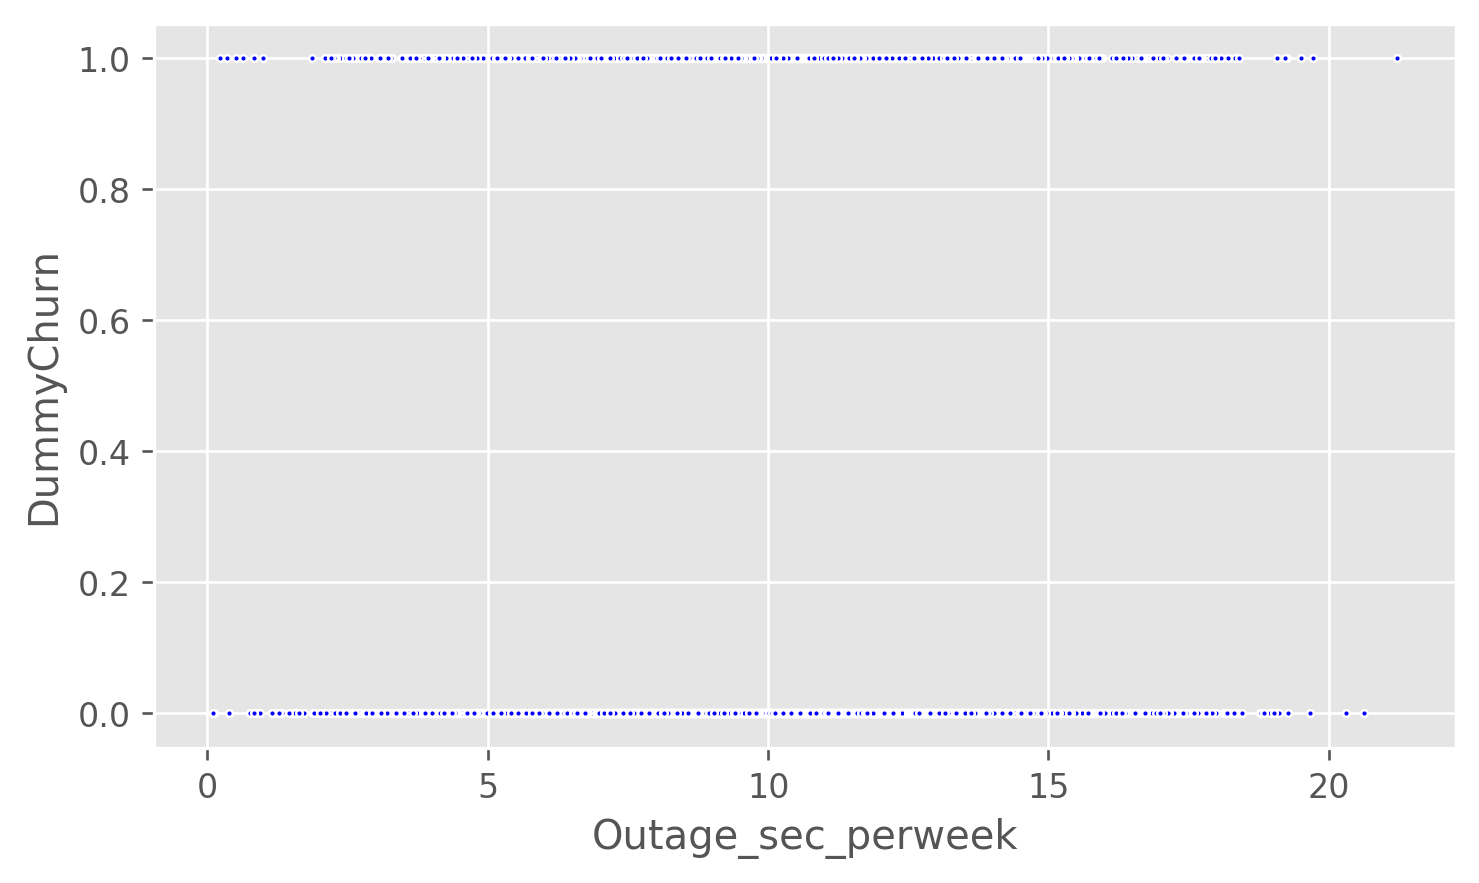

In [24]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=churn_df['Outage_sec_perweek'], y=churn_df['DummyChurn'], color='blue')
plt.show();

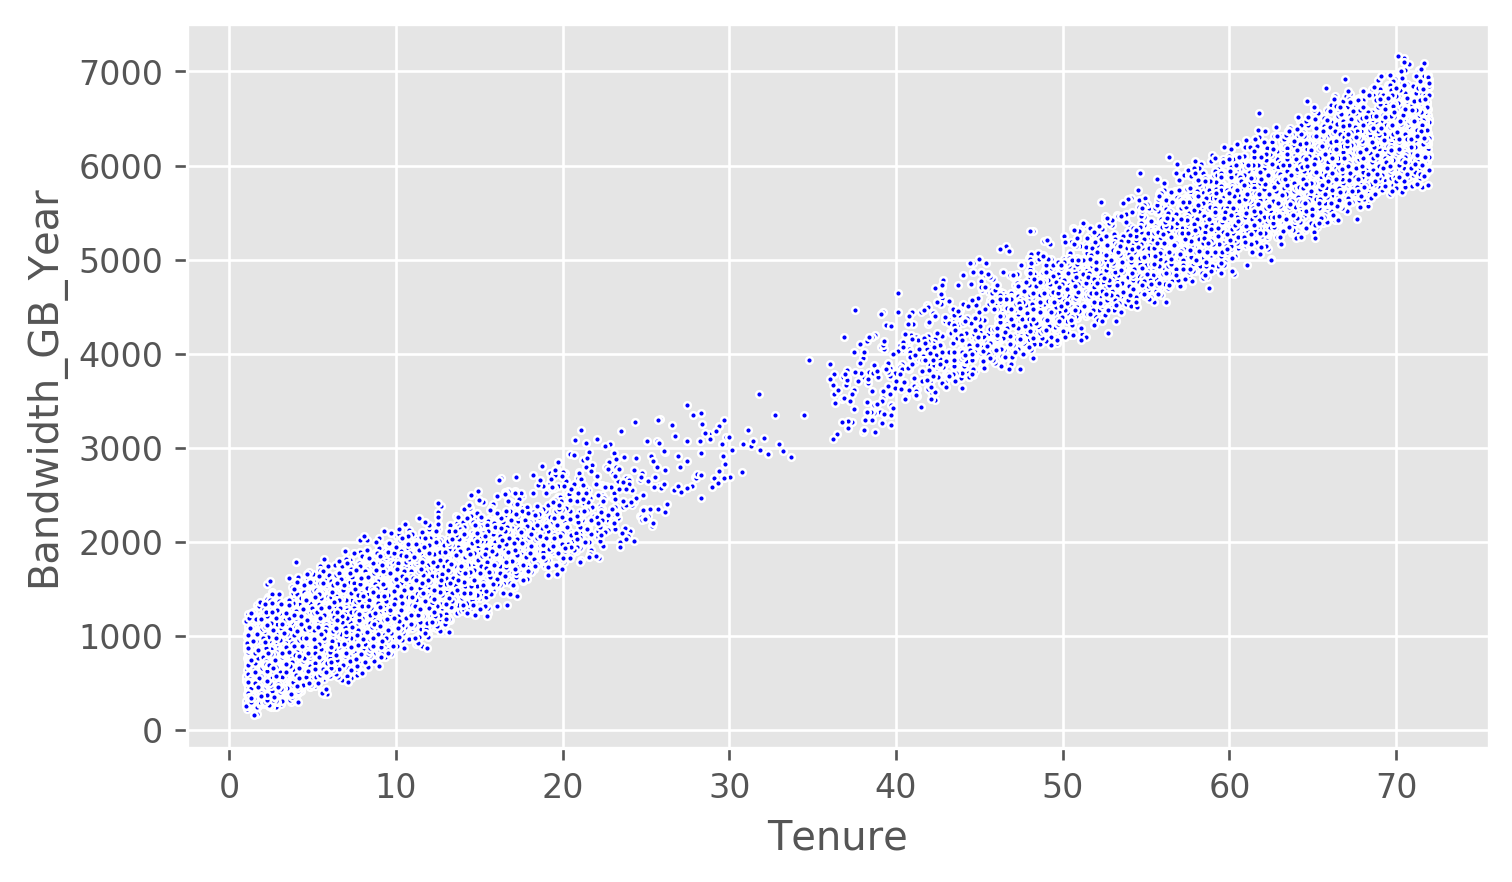

In [25]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=churn_df['Tenure'], y=churn_df['Bandwidth_GB_Year'], color='blue')
plt.show();

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


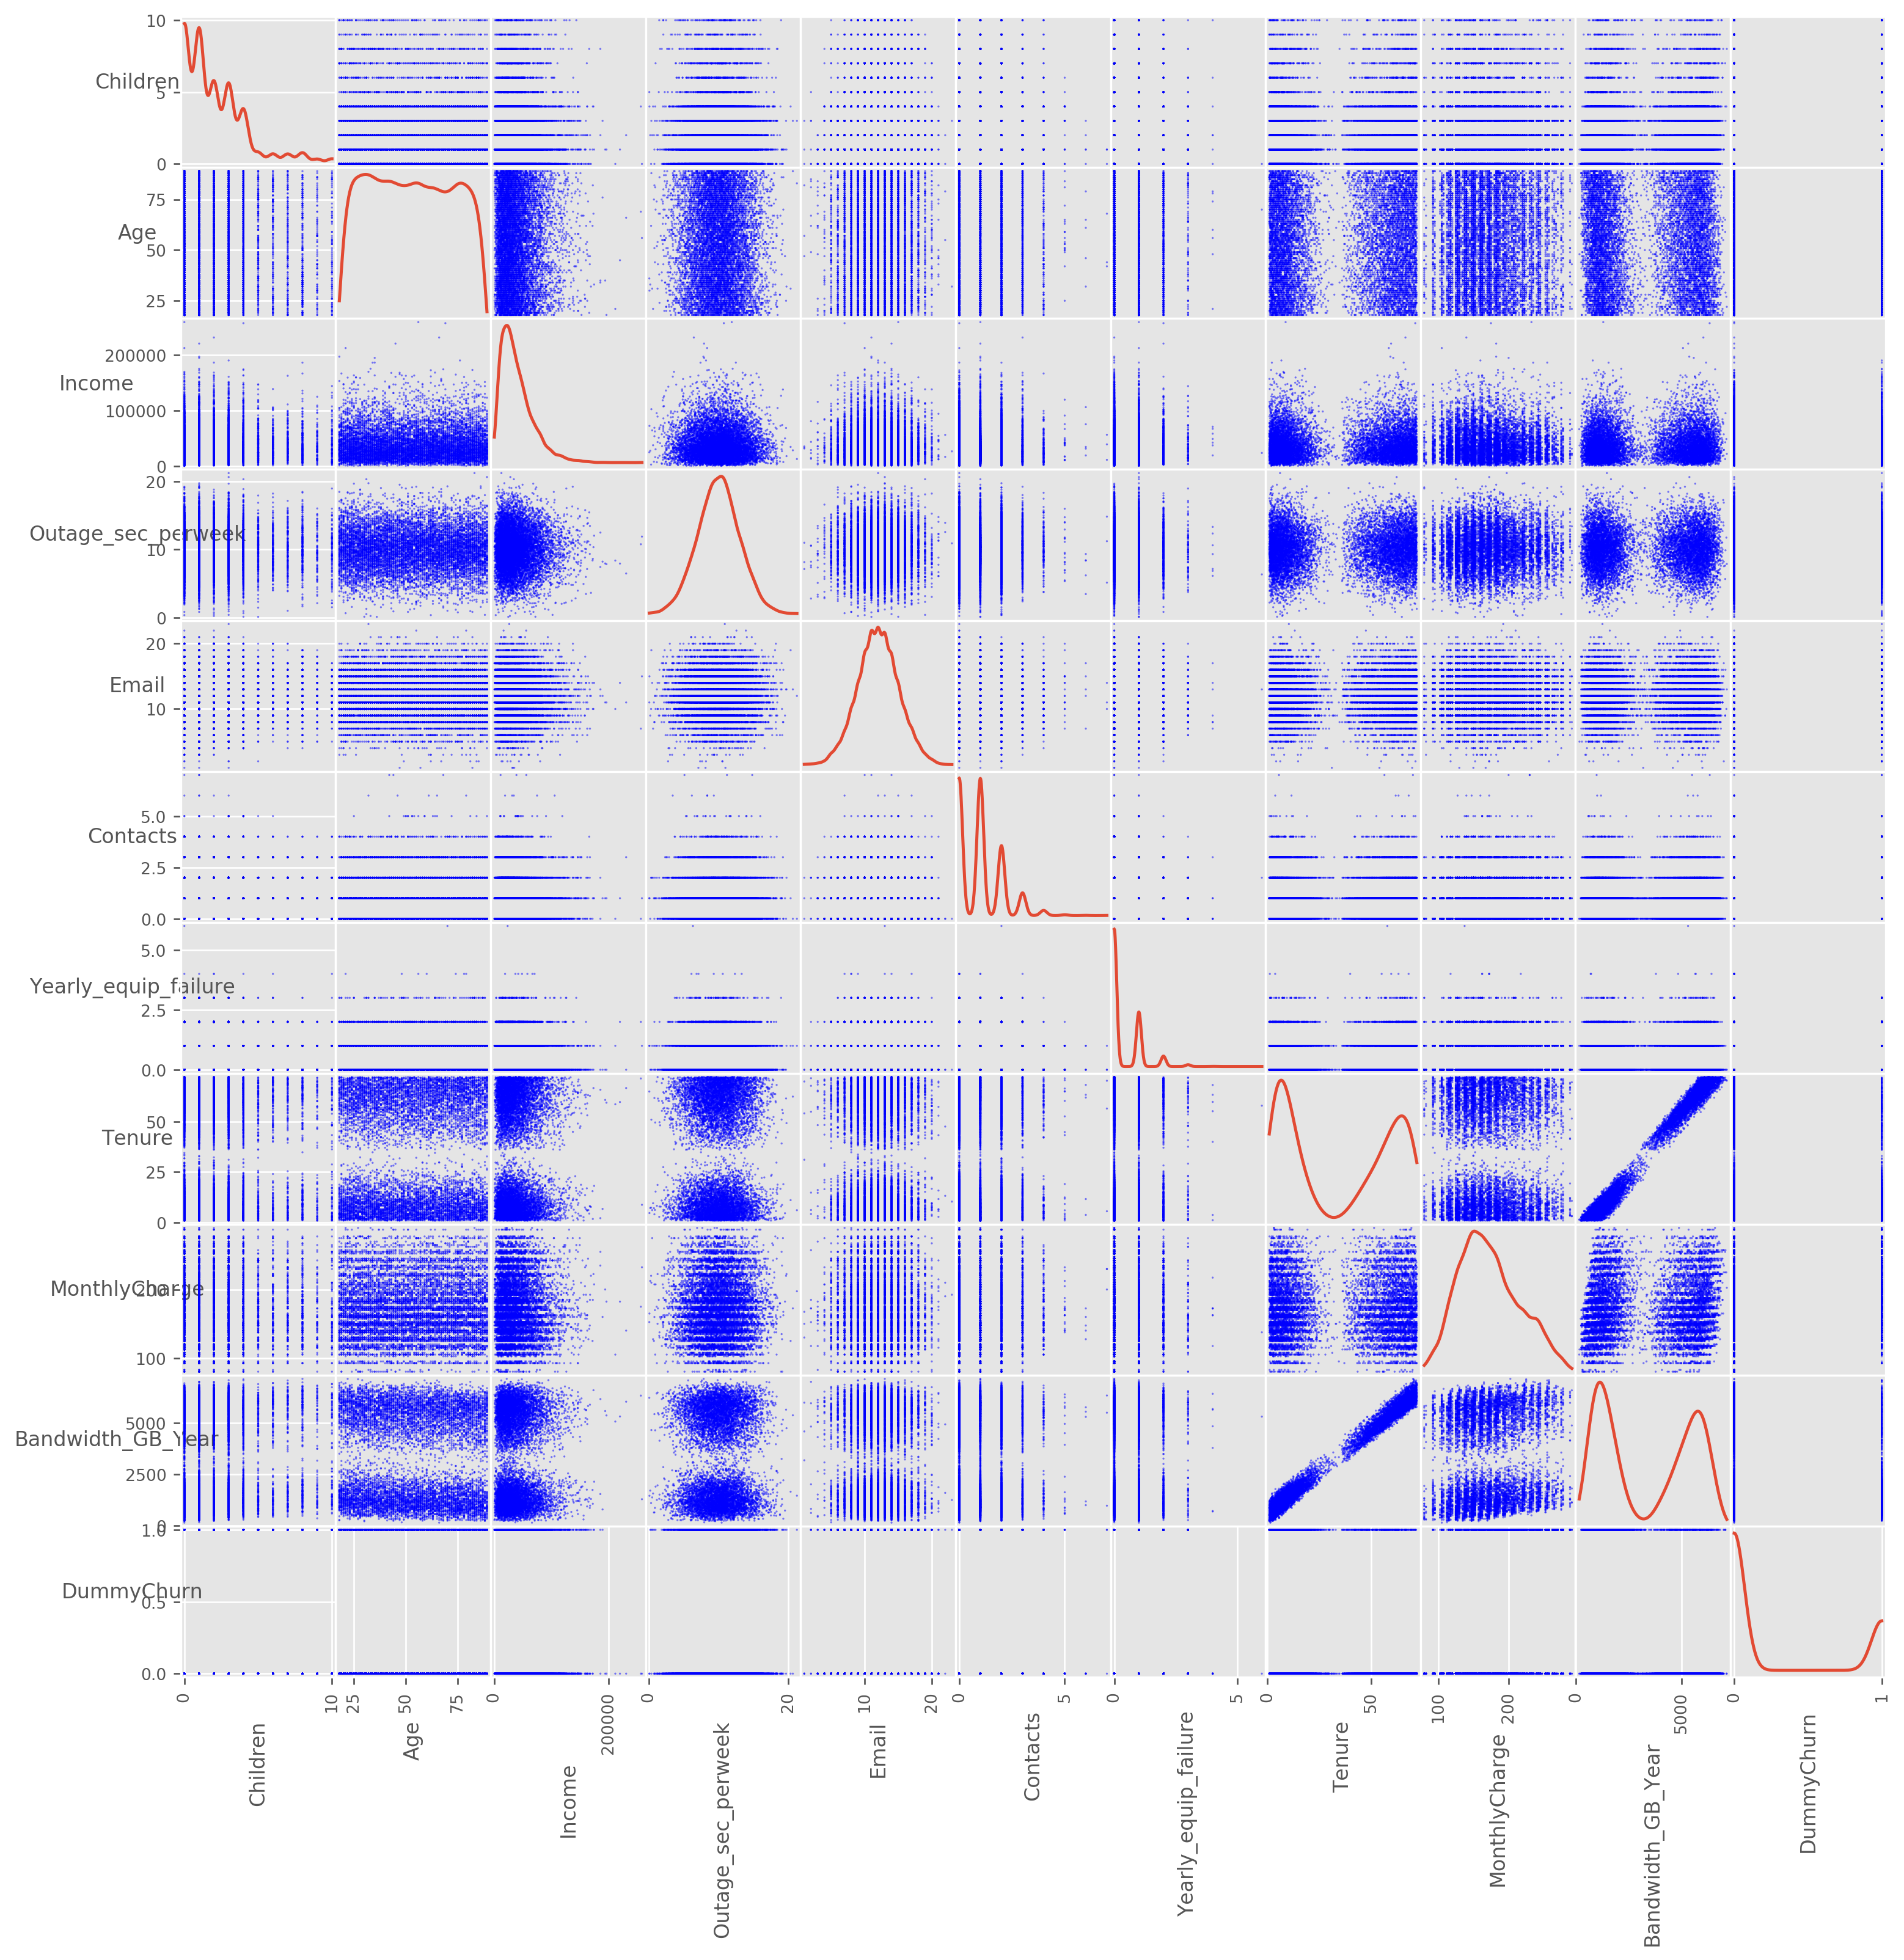

In [27]:
# P# Provide a scatter matrix of numeric variables for high level overview of potential relationships & distributions
churn_numeric = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 
                          'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 
                          'MonthlyCharge', 'Bandwidth_GB_Year', 'DummyChurn']]


scatter_matrix = pd.plotting.scatter_matrix(
    churn_numeric,
    figsize  = [15, 15],
    diagonal = "kde",
    color="b"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

In [ ]:
# Countplot more useful than scatter_matrix when features of dataset are binary
plt.figure()
sns.countplot(x='Techie', hue='Churn', data=churn_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [ ]:
# Countplot more useful than scatter_matrix when features of dataset are binary
plt.figure()
sns.countplot(x='PaperlessBilling', hue='Churn', data=churn_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [ ]:
# Countplot more useful than scatter_matrix when features of dataset are binary
plt.figure()
sns.countplot(x='InternetService', hue='Churn', data=churn_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [ ]:
# Create multiple boxplots for continuous & categorical variables
churn_df.boxplot(column=['MonthlyCharge','Bandwidth_GB_Year'])

In [ ]:
# Create Seaborn boxplots for continuous & categorical variables
sns.boxplot('MonthlyCharge', data = churn_df)
plt.show()

In [ ]:
# Create Seaborn boxplots for continuous & categorical variables
sns.boxplot('Bandwidth_GB_Year', data = churn_df)
plt.show()

In [ ]:
# Create Seaborn boxplots for continuous variables
sns.boxplot('Tenure', data = churn_df)
plt.show()

#### Anomalies
It appears that anomolies have been removed from the supplied dataset, churn_clean.csv. &nbsp; There are no remaining outliers.

In [ ]:
# Discover missing data points within dataset
data_nulls = churn_df.isnull().sum()
print(data_nulls)

In [ ]:
# Check for missing data & visualize missing values in dataset 

# Install appropriate library
!pip install missingno

# Importing the libraries
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(churn_df);
"""(GeeksForGeeks, p. 1)"""

In [ ]:
churn_df.head()

In [ ]:
# List features for analysis
features = (list(churn_df.columns[:-1]))
print('Features for analysis include: \n', features)

In [ ]:
# Extract Clean dataset
churn_df.to_csv('data/churn_prepared_pca.csv')

#### <span style="color:green"><b>C2. Standardization of Dataset Variables</b>:</span>
<span style="color:red">Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.</span>

Initial dataset variables used to perform the analysis for the classification analysis identified & classified as continuous or categorical below.

#### <span style="color:orange"><b>Applying PCA w Hadelin</b></span>

In [ ]:
# Normalize the data
churn_normalized = (churn_df - churn_df.mean()) / churn_df.std()

In [ ]:
# Create a list of PCA names
churn_numeric = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 
                      'Email', 'Contacts','Yearly_equip_failure', 
                      'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
pcs_names = []
for i, col in enumerate(churn_numeric.columns):
    pcs_names.append('PC' + str(i + 1))
print(pcs_names)

In [ ]:
# Call PCA application & convert the dataset of 11 variables into a dataset of 11 components
pca.fit(churn_normalized)
churn_pca = pd.DataFrame(pca.transform(churn_normalized),
                        columns = pcs_names)

In [ ]:
# Run the scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show();

In [ ]:
# Extract the eigenvalues
cov_matrix = np.dot(churn_normalized.T, churn_normalized) / data.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) 
               for eigenvector in pca.components_]

In [ ]:
# Plot the eigenvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.show();

In [ ]:
# Select the fewest components 
for pc, var in zip(pcs_names, np.cumsum(pca.explained_variance_ratio_)):
    print(pc, var)

In [ ]:
# Above, we see that 86% of variance is explained by 7 components
# Create a rotation 
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index = churn_numeric.columns)
print(rotation)

In [ ]:
# Output loadings for components
loadings = pd.DataFrame(pca.components_.T,
                       columns = pcs_names,
                       index = data.columns)
loadings

In [ ]:
# Finally, extract reduced dataset & print 3 components
churn_reduced = churn_pca.iloc[ : , 0:3]
print(churn_reduced)

#### Part IV: Analysis
D. Perform PCA by doing the following:

In [ ]:
# Re-read fully numerical prepared dataset
churn_df = pd.read_csv('data/churn_prepared_pca.csv')

# Set predictor features & target variable
X = churn_df.drop('DummyChurn', axis=1).values
y = churn_df['DummyChurn'].values

In [ ]:
# Import model, splitting method & metrics from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

#### <span style="color:green"><b>D1. Principal Components</b></span>
<span style="color:red">Determine the matrix of all the principal components.</span>

In [ ]:
# Set seed for reproducibility
SEED = 1

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [ ]:
# Instantiate KNN model 
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit data to KNN model
knn.fit(X_train, y_train)

# Predict outcomes from test set
y_pred = knn.predict(X_test)

#### <span style="color:green"><b>D2. Identification of Total Number of Components</b></span>
<span style="color:red">Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.</span>

#### <span style="color:green"><b>D3. Total Variance of Components</b></span>
<span style="color:red">Identify the variance of each of the principal components identified in part D2.</span>

#### <span style="color:green"><b>D4. Total Variance Captured by Components</b></span>
<span style="color:red">Identify the total variance captured by the principal components identified in part D2.</span>

#### <span style="color:green"><b>D5. Summary of Data Analysis</b></span>
<span style="color:red">Summarize the results of your data analysis.</span>

It is critical that decision-makers & marketers understand that our predictor variables create a relatively low accuracy score with the results of an 0.84 after scaling.   We should analyse the features that are in common among those leaving the company & attempt to reduce their likelihood of occuring with any given customer in the future.   This suggests that as a customer subscribes to more services that the company provided, an additional port modem or online backup for example, they are less likely to leave the company.   Clearly, it is the best interest of retaining customers to provide them with more services & improve their experience with the company by helping customers understand all the services that are available to them as a subscriber, not simple mobile phone service.

In [ ]:
# Print initial accuracy score of KNN model
print('Initial accuracy score KNN model: ', accuracy_score(y_test, y_pred))

In [ ]:
# Compute classification metrics
print(classification_report(y_test, y_pred))

In [ ]:
# Create pipeline object & scale dataframe
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Set steps for pipeline object
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

# Instantiate pipeline
pipeline = Pipeline(steps)

# Split dataframe
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.2, random_state = SEED)

# Scale dateframe with pipeline object
knn_scaled = pipeline.fit(X_train_scaled, y_train_scaled)

# Predict from scaled dataframe
y_pred_scaled = pipeline.predict(X_test_scaled)

In [ ]:
# Print new accuracy score of scaled KNN model
print('New accuracy score of scaled KNN model: {:0.3f}'.format(accuracy_score(y_test_scaled, y_pred_scaled)))

In [ ]:
# Compute classification metrics after scaling
print(classification_report(y_test_scaled, y_pred_scaled))

In [ ]:
# Import sklearn confusion_matrix & generate results
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

In [ ]:
# Create a visually more intuitive confusion matrix
"""(Dennis, pg. 1)"""
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#### Model Comparison
It appears that scaling improved model performance from an <b>Accuracy</b> of 0.71 to 0.79 & <b>Precision</b> of 0.78 to 0.84. The area under the curve is a decent score at 0.7959.

In [ ]:
# Import GridSearchCV for cross validation of model
from sklearn.model_selection import GridSearchCV

# Set up parameters grid
param_grid = {'n_neighbors': np.arange(1, 50)}

# Re-intantiate KNN for cross validation
knn = KNeighborsClassifier()

# Instantiate GridSearch cross validation
knn_cv = GridSearchCV(knn , param_grid, cv=5)

# Fit model to 
knn_cv.fit(X_train, y_train)

# Print best parameters
print('Best parameters for this KNN model: {}'.format(knn_cv.best_params_))

In [ ]:
# Generate model best score
print('Best score for this KNN model: {:.3f}'.format(knn_cv.best_score_))

In [ ]:
# Import ROC AUC metrics for explaining the area under the curve
from sklearn.metrics import roc_auc_score

# Fit it to the data
knn_cv.fit(X, y)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_cv.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("The Area under curve (AUC) on validation dataset is: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

In [ ]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(knn_cv, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

#### <span style="color:green"><b> E. Sources for Third-Party Code</b></span>
* GeeksForGeeks. &ensp; (2019, July 4). &ensp; <i>Python | Visualize missing values (NaN) values using Missingno Library</i>. &ensp; GeeksForGeeks. &ensp; https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
<br>
* Dennis, T. &ensp; (2019, July 25). &ensp; <i>Confusion Matrix Visualization</i>. &ensp; Medium. &ensp; https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
<br>
* SuperDataScience. &ensp; (2021, August 15) &ensp; <i>Machine Learning A-Z: Hands-On Python & R in Data Science</i>. &ensp; https://www.superdatascience.com/

#### <span style="color:green"><b> F. Sources</b></span>
* CBTNuggets. &ensp; (2018, September 20). &ensp; <i>Why Data Scientists Love Python</i>. &ensp; CBTNuggets. &ensp; https://www.cbtnuggets.com/blog/technology/data/why-data-scientists-love-python
<br> 
* Massaron, L. & Boschetti, A. &ensp; (2016). &ensp; <i>Regression Analysis with Python</i>. &ensp; Packt Publishing.

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('OFM3_OFM3_TASK_2_DIMENSIONALITY_REDUCTION_METHODS.ipynb')